In [1]:
import tensorflow as tf

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
print('版本：'.format(tf.version))

版本：


In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

In [5]:
imgs_path=glob.glob('C:\\Users\\Administrator\\Desktop\\my_cnn\\data_prepare\\data\\my_train\\train\\*\\*.png')#获取当前目录所有文件夹

In [6]:
imgs_path[:5]
len(imgs_path)

258947

In [7]:
print(imgs_path[1])

#imgs=tf.io.read_file(imgs_path[1])
#plt.imshow(imgs)
#my_imgs=tf.io.read_file(r'C:/Users/Administrator/Desktop/my_cnn/data_prepare/data/my_train\久\17691.bmp')
#plt.imshow(my_imgs)

C:\Users\Administrator\Desktop\my_cnn\data_prepare\data\my_train\train\0\dsa.png


In [8]:
img_p=imgs_path[1000]#切割名称
img_p
r=img_p.split('my_train')[-1]
l=img_p.split('my_train')[0]
accpath=l+'my_test'+r
print(accpath)


C:\Users\Administrator\Desktop\my_cnn\data_prepare\data\my_test\train\a1\img037-026.png


In [9]:
all_labels_name=[img_p.split('\\')[9] for img_p in imgs_path]#获取所有标签

In [10]:
all_labels_name

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [11]:
np.unique(all_labels_name)

array(['0', '1', '2', ..., '龙', '龚', '龟'], dtype='<U2')

In [12]:
label_names=np.unique(all_labels_name)
len(label_names)
#print

3811

In [13]:
label_to_index=dict((name,i)for i,name in enumerate(label_names))
label_to_index

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 'a1': 36,
 'b1': 37,
 'c1': 38,
 'd1': 39,
 'e1': 40,
 'f1': 41,
 'g1': 42,
 'h1': 43,
 'i1': 44,
 'j1': 45,
 'k1': 46,
 'l1': 47,
 'm1': 48,
 'n1': 49,
 'o1': 50,
 'p1': 51,
 'q1': 52,
 'r1': 53,
 's1': 54,
 't1': 55,
 'u1': 56,
 'v1': 57,
 'w1': 58,
 'x1': 59,
 'y1': 60,
 'z1': 61,
 '一': 62,
 '丁': 63,
 '七': 64,
 '万': 65,
 '丈': 66,
 '三': 67,
 '上': 68,
 '下': 69,
 '不': 70,
 '与': 71,
 '丑': 72,
 '专': 73,
 '且': 74,
 '世': 75,
 '丘': 76,
 '丙': 77,
 '业': 78,
 '丛': 79,
 '东': 80,
 '丝': 81,
 '丢': 82,
 '两': 83,
 '严': 84,
 '丧': 85,
 '个': 86,
 '丫': 87,
 '中': 88,
 '丰': 89,
 '串': 90,
 '临': 91,
 '丸': 92,
 '丹': 93,
 '为': 94,
 '主': 95,
 '丽': 96,
 '举': 97,
 '乃'

In [14]:
index_to_label=dict((v,k)for k,v in label_to_index.items())
index_to_label

f = open(r'C:\Users\Administrator\Desktop\my_cnn\无索引.txt','w')
for i in index_to_label:
    s = str(index_to_label[i])
    #f.writelines(str(i)+':')
    f.writelines(s)
    f.writelines('\n')
#f.writelines(s)
f.close()

In [15]:
all_labels=[label_to_index.get(name)for name in all_labels_name]#数据回归，统合每个图片

In [16]:
all_labels[-5:]#查看后三个图片

[3810, 3810, 3810, 3810, 3810]

In [17]:
np.random.seed(2022)
random_index=np.random.permutation(len(imgs_path))#伪随机，每次随机结果是一样的
#随机种子为2022

In [18]:
imgs_path=np.array(imgs_path)[random_index]#图片标签一一对应，乱序一样
all_labels=np.array(all_labels)[random_index]

In [19]:
i=int(len(imgs_path)*0.8)#百分之80作为训练集
                         #百分之20作为测试集

In [20]:
i

245999

In [21]:
train_path=imgs_path[:i]
train_labels=all_labels[:i]
test_path=imgs_path[i:]
test_labels=all_labels[i:]

In [22]:
len(train_path)

245999

In [23]:
train_path[1]

'C:\\Users\\Administrator\\Desktop\\my_cnn\\data_prepare\\data\\my_train\\train\\玲\\94398.png'

In [101]:
def my_load_img(path):
    i=0
    #image=np.array(image)
    while(i<len(path)):
        image[i]=tf.io.read_file(path[i])
        image[i]=tf.image.decode_image(image[i],channels=3)#解码图片格式为bmp，维度为3
        image[i]=tf.image.resize(image[i],[70,70])#定义大小这里改一下
        image[i]=tf.cast(image[i],tf.float32)
        image[i]=image[i]/255#归一化
        i=i+1
    return image

def load_img(path,label):
    image=tf.io.read_file(path)
    image=tf.image.decode_png(image,channels=1)#解码图片格式为png，通道为1
    image=tf.image.resize(image,[80,80])#定义大小这里改一下
    image=tf.cast(image,tf.float32)
    image=image/255#归一化
    return image,label


#读取为tf数据，所有路径和标签
train_ds=tf.data.Dataset.from_tensor_slices((train_path,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_path,test_labels))

In [102]:
#重要的形状
train_ds

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [104]:
BATCH_SIZE=32

In [105]:
train_ds=train_ds.repeat().shuffle(300).batch(BATCH_SIZE)

In [106]:
train_ds

<BatchDataset shapes: ((None, 80, 80, 1), (None,)), types: (tf.float32, tf.int32)>

In [107]:
test_ds=test_ds.batch(BATCH_SIZE)

# 建立模型

In [108]:
# 多少个分类就输出长度为多少的张量  这里为3747分类
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(80,80,1),
    activation='relu',name='my_iuput'),
    tf.keras.layers.BatchNormalization (),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(516,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3811,name='my_output')##3811分类;不激活输出，
])


In [109]:
##train_ds.shape

model = keras.models.load_model('C:/Users/Administrator/Desktop/my_cnn/断点/6月21日.h5')

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_iuput (Conv2D)            (None, 78, 78, 64)        640       
_________________________________________________________________
batch_normalization_59 (Batc (None, 78, 78, 64)        256       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 76, 76, 64)        36928     
_________________________________________________________________
batch_normalization_60 (Batc (None, 76, 76, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 36, 36, 128)       73856     
_________________________________________________________________
batch_normalization_61 (Batc (None, 36, 36, 128)      

In [111]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00008),#速率
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#因为模型没有激活，所以要加括号里的内容
              metrics=['acc']
)

In [112]:
train_count=len(train_path)
test_count=len(test_path)

In [113]:
steps_per_epoch=train_count//BATCH_SIZE
validation_steps=test_count//BATCH_SIZE

history = model.fit(train_ds,epochs=3,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=test_ds,
                     validation_steps=validation_steps)

In [ ]:
#断点
checkpoint_path = 'C:/Users/Administrator/Desktop/my_cnn/断点/6月25日.h5'
#checkpoint_dir = os.path.dirname(checkpoint_path)相对路径
checkpoint_dir = checkpoint_path#相对路径

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_best_only=True,
                                                 )

model.save_weights(checkpoint_path.format(epoch=0))

history = model.fit(train_ds,epochs=300,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=test_ds,
                     validation_steps=validation_steps,
                     callbacks = [cp_callback]
                     #verbose=0)
                     )





Epoch 1/300
7687/7687 [==============================] - 2098s 273ms/step - loss: 6.2194 - acc: 0.1011 - val_loss: 4.0012 - val_acc: 0.3132
Epoch 2/300
7687/7687 [==============================] - 2104s 274ms/step - loss: 2.4289 - acc: 0.5911 - val_loss: 1.3412 - val_acc: 0.7706
Epoch 3/300
7687/7687 [==============================] - 2104s 274ms/step - loss: 0.8876 - acc: 0.8372 - val_loss: 0.6979 - val_acc: 0.8543
Epoch 4/300
7687/7687 [==============================] - 2103s 274ms/step - loss: 0.5077 - acc: 0.8954 - val_loss: 0.5488 - val_acc: 0.8735
Epoch 5/300
7687/7687 [==============================] - 2103s 274ms/step - loss: 0.3495 - acc: 0.9261 - val_loss: 0.5221 - val_acc: 0.8752
Epoch 6/300
7687/7687 [==============================] - 2103s 274ms/step - loss: 0.2548 - acc: 0.9472 - val_loss: 0.5277 - val_acc: 0.8703
Epoch 7/300
7687/7687 [==============================] - 2108s 274ms/step - loss: 0.1913 - acc: 0.9617 - val_loss: 0.5157 - val_acc: 0.8724
Epoch 8/300
7687/768

history = model.fit(train_ds,epochs=50,
                     callbacks = [cp_callback],
                     #verbose=0,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=test_ds,
                     validation_steps=validation_steps
                     )

In [81]:
model.save('C:/Users/Administrator/Desktop/my_cnn/断点/6月23日.h5')

In [31]:
#查看最新的检查点
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)


NameError: name 'checkpoint_dir' is not defined

In [89]:
#加载模型
new_model = keras.models.load_model('C:/Users/Administrator/Desktop/my_cnn/断点/6月24日.h5')
new_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_iuput (Conv2D)            (None, 58, 58, 64)        640       
_________________________________________________________________
batch_normalization_32 (Batc (None, 58, 58, 64)        256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_33 (Batc (None, 56, 56, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 128)      

In [90]:
#评估模型
loss, acc =new_model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

405/405 [==============================] - 4s 10ms/step - loss: 0.6233 - acc: 0.9027
Restored model, accuracy: 90.27%


要测试，请重置模型并加载最新的检查点
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


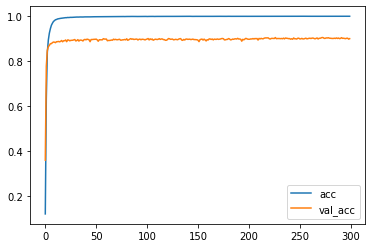

In [64]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()
#tf.keras.models.save_model(network,"C:/Users/Administrator/Desktop/my_cnn/my_pb")
#model.save('C:/Users/Administrator/Desktop/my_cnn/5_23_9284汉字_model_save.h5')

# 多分类使用模型预测

In [65]:
import cv2
def load_and_preprocess_image(path): #预处理
    image=tf.io.read_file(path)
    #image=tf.image.decode_bmp(image,channels=1)#解码图片格式为bmp，通道为1
    image=tf.image.decode_bmp(image,channels=1)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image=tf.image.resize(image,[70,70])#定义大小这里改一下
    image=tf.cast(image,tf.float32)
    image=image/255#归一化
    return image

In [81]:
pre_img=r'C:\Users\Administrator\Desktop\测试\无标题.bmp'
test_tensor=load_and_preprocess_image(pre_img)#预测图片加载
test_tensor=tf.expand_dims(test_tensor,axis=0)#扩张维度，因为模型输入是4维度的。
pred=model.predict(test_tensor)#预测


In [82]:
index_to_label.get(np.argmax(pred))

'斤'

In [66]:
def load_and_preprocess_image(path): #预处理
    image=tf.io.read_file(path)
    image=tf.image.decode_png(image,channels=1)#解码图片格式为bmp，通道为1
    image=tf.image.resize(image,[60,60])#定义大小这里改一下
    image=tf.cast(image,tf.float32)
    image=image/255#归一化
    return image

def find_sub_maxnext(arr,n):
    arr_=arr
    for i in range(n-1):
        arr_ = arr
        arr_[np.argmax(arr_)] = np.min(arr)
        arr = arr_
   # print("# arr中最大的数为{}，位于第{}位".format(np.max(arr_), np.argmax(arr_)+1))
    return np.argmax(arr_)

k1
h1
氧
霸
脆
声
姓
脾
l1
仓


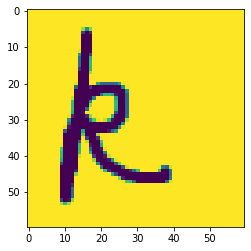

In [77]:
pre_img=r'C:\Users\Administrator\Desktop\测试\小k.png'
test_tensor=load_and_preprocess_image(pre_img)#预测图片加载
plt.imshow(test_tensor)
test_tensor=tf.expand_dims(test_tensor,axis=0)#扩张维度，因为模型输入是4维度的。
pred=model.predict(test_tensor)#预测
print(index_to_label.get(np.argmax(pred)))
a=pred.flatten()
print(index_to_label.get(find_sub_maxnext(a,2)))
print(index_to_label.get(find_sub_maxnext(a,3)))
print(index_to_label.get(find_sub_maxnext(a,4)))
print(index_to_label.get(find_sub_maxnext(a,5)))
print(index_to_label.get(find_sub_maxnext(a,6)))
print(index_to_label.get(find_sub_maxnext(a,7)))
print(index_to_label.get(find_sub_maxnext(a,8)))
print(index_to_label.get(find_sub_maxnext(a,9)))
print(index_to_label.get(find_sub_maxnext(a,10)))